In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

In [4]:
df = pd.read_csv("Drugs_Data.csv")

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df = df.drop(['id', 'Unnamed: 32'], axis = 1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [9]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [10]:
diagnosis_map = {'M':1, 'B':0}
df.diagnosis = df.diagnosis.map(diagnosis_map)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
x = df.drop(columns = ['diagnosis'], axis = 1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
y = df.diagnosis
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [15]:
#call model
nb_model = GaussianNB()

#fit model
nb_model.fit(x_train, y_train)

#predict data
y_pred = nb_model.predict(x_test)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [18]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[71,  0],
       [ 3, 40]], dtype=int64)

<Axes: >

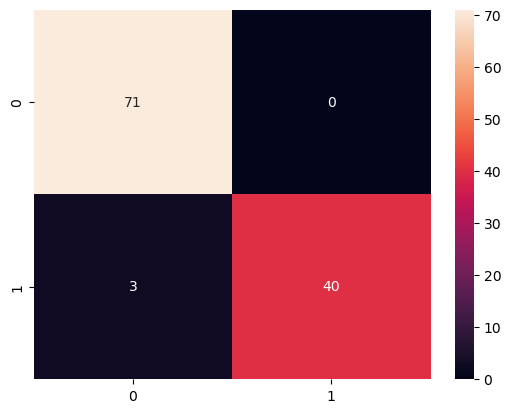

In [19]:
sns.heatmap(cm, annot = True)

In [21]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



<Axes: >

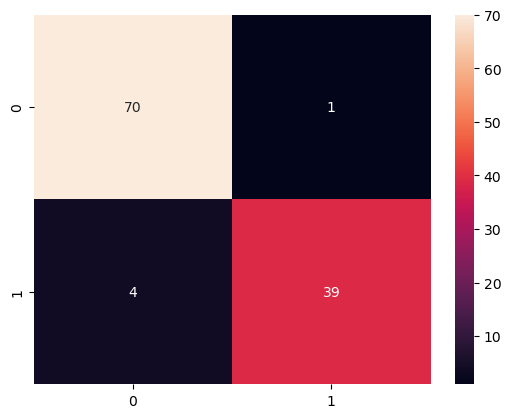

In [23]:
cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm, annot = True)

## **Example 2**

In [24]:
df = pd.read_csv("predictive_maintenance.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [27]:
df = df.drop(['UDI', 'Product ID'], axis = 1)

In [28]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [29]:
df['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
encoder = LabelEncoder()
df['Type'] = encoder.fit_transform(df['Type'])

In [32]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,2,298.1,308.6,1551,42.8,0,0,No Failure
1,1,298.2,308.7,1408,46.3,3,0,No Failure
2,1,298.1,308.5,1498,49.4,5,0,No Failure
3,1,298.2,308.6,1433,39.5,7,0,No Failure
4,1,298.2,308.7,1408,40.0,9,0,No Failure


In [33]:
df['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [34]:
df['Failure Type'] = encoder.fit_transform(df['Failure Type'])

In [35]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,2,298.1,308.6,1551,42.8,0,0,1
1,1,298.2,308.7,1408,46.3,3,0,1
2,1,298.1,308.5,1498,49.4,5,0,1
3,1,298.2,308.6,1433,39.5,7,0,1
4,1,298.2,308.7,1408,40.0,9,0,1


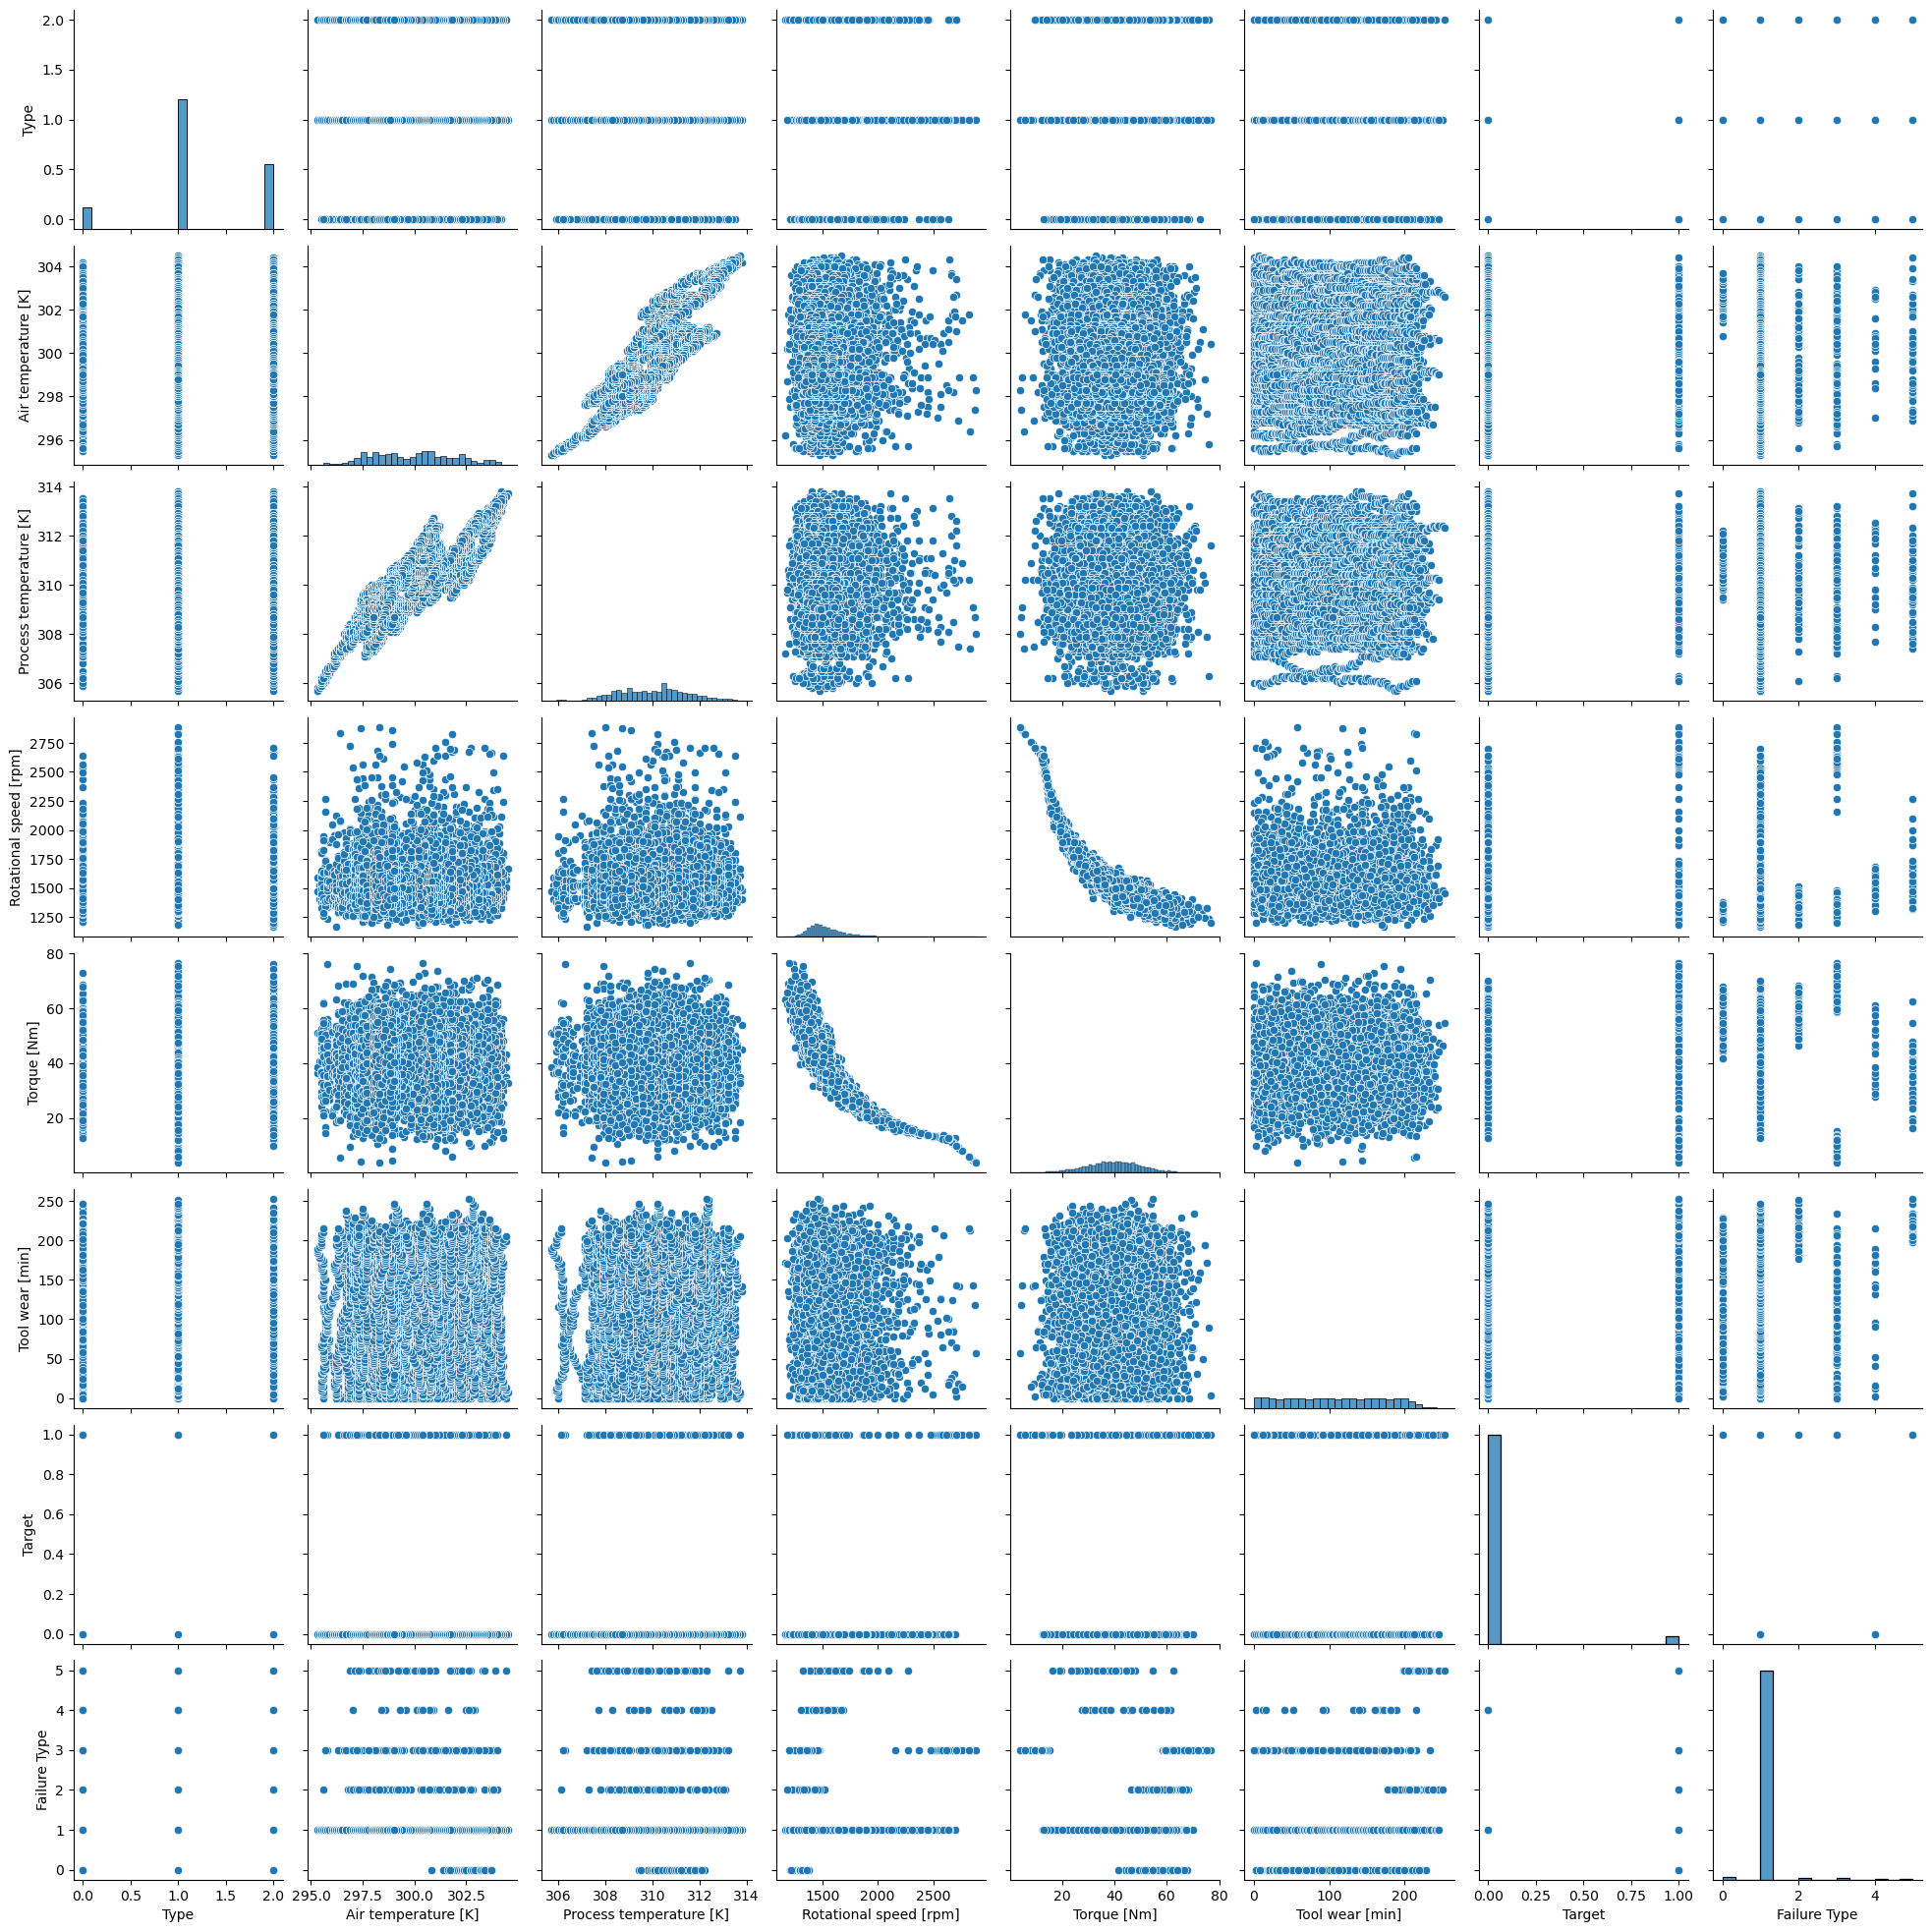

In [36]:
sns.pairplot(df)

In [37]:
x = df.drop(columns = ['Failure Type'], axis = 1)
x.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,2,298.1,308.6,1551,42.8,0,0
1,1,298.2,308.7,1408,46.3,3,0
2,1,298.1,308.5,1498,49.4,5,0
3,1,298.2,308.6,1433,39.5,7,0
4,1,298.2,308.7,1408,40.0,9,0


In [38]:
y = df['Failure Type']

In [39]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Failure Type, dtype: int32

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [41]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [44]:
nb_model.fit(x_train, y_train)
nb_pred = nb_model.predict(x_test)

In [46]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.97      1.00      0.98      2903
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        31
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        14

    accuracy                           0.97      3000
   macro avg       0.16      0.17      0.16      3000
weighted avg       0.94      0.97      0.95      3000



D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
y_train.value_counts()

1    6749
0      89
3      64
2      56
5      31
4      11
Name: Failure Type, dtype: int64

## **KNN**

In [ ]:
calculate distance:
    1- eucildean distance
    2- manhattan distance

steps:
    1- select k value
    2- calculate distance
    3- finding nearest neighbors
    4- voting for classification

In [48]:
df = pd.read_csv("glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [49]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [50]:
numerical = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
categorical = ['Type']

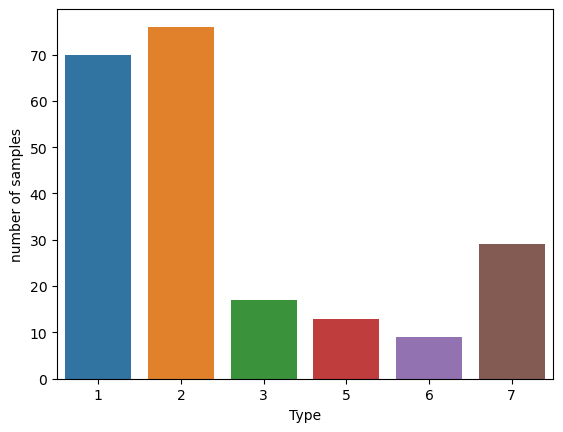

In [52]:
for i in df[categorical].columns:
    sns.barplot(x = df[categorical][i].value_counts().index, y = df[categorical][i].value_counts())
    plt.xlabel(i)
    plt.ylabel("number of samples")
    plt.show()

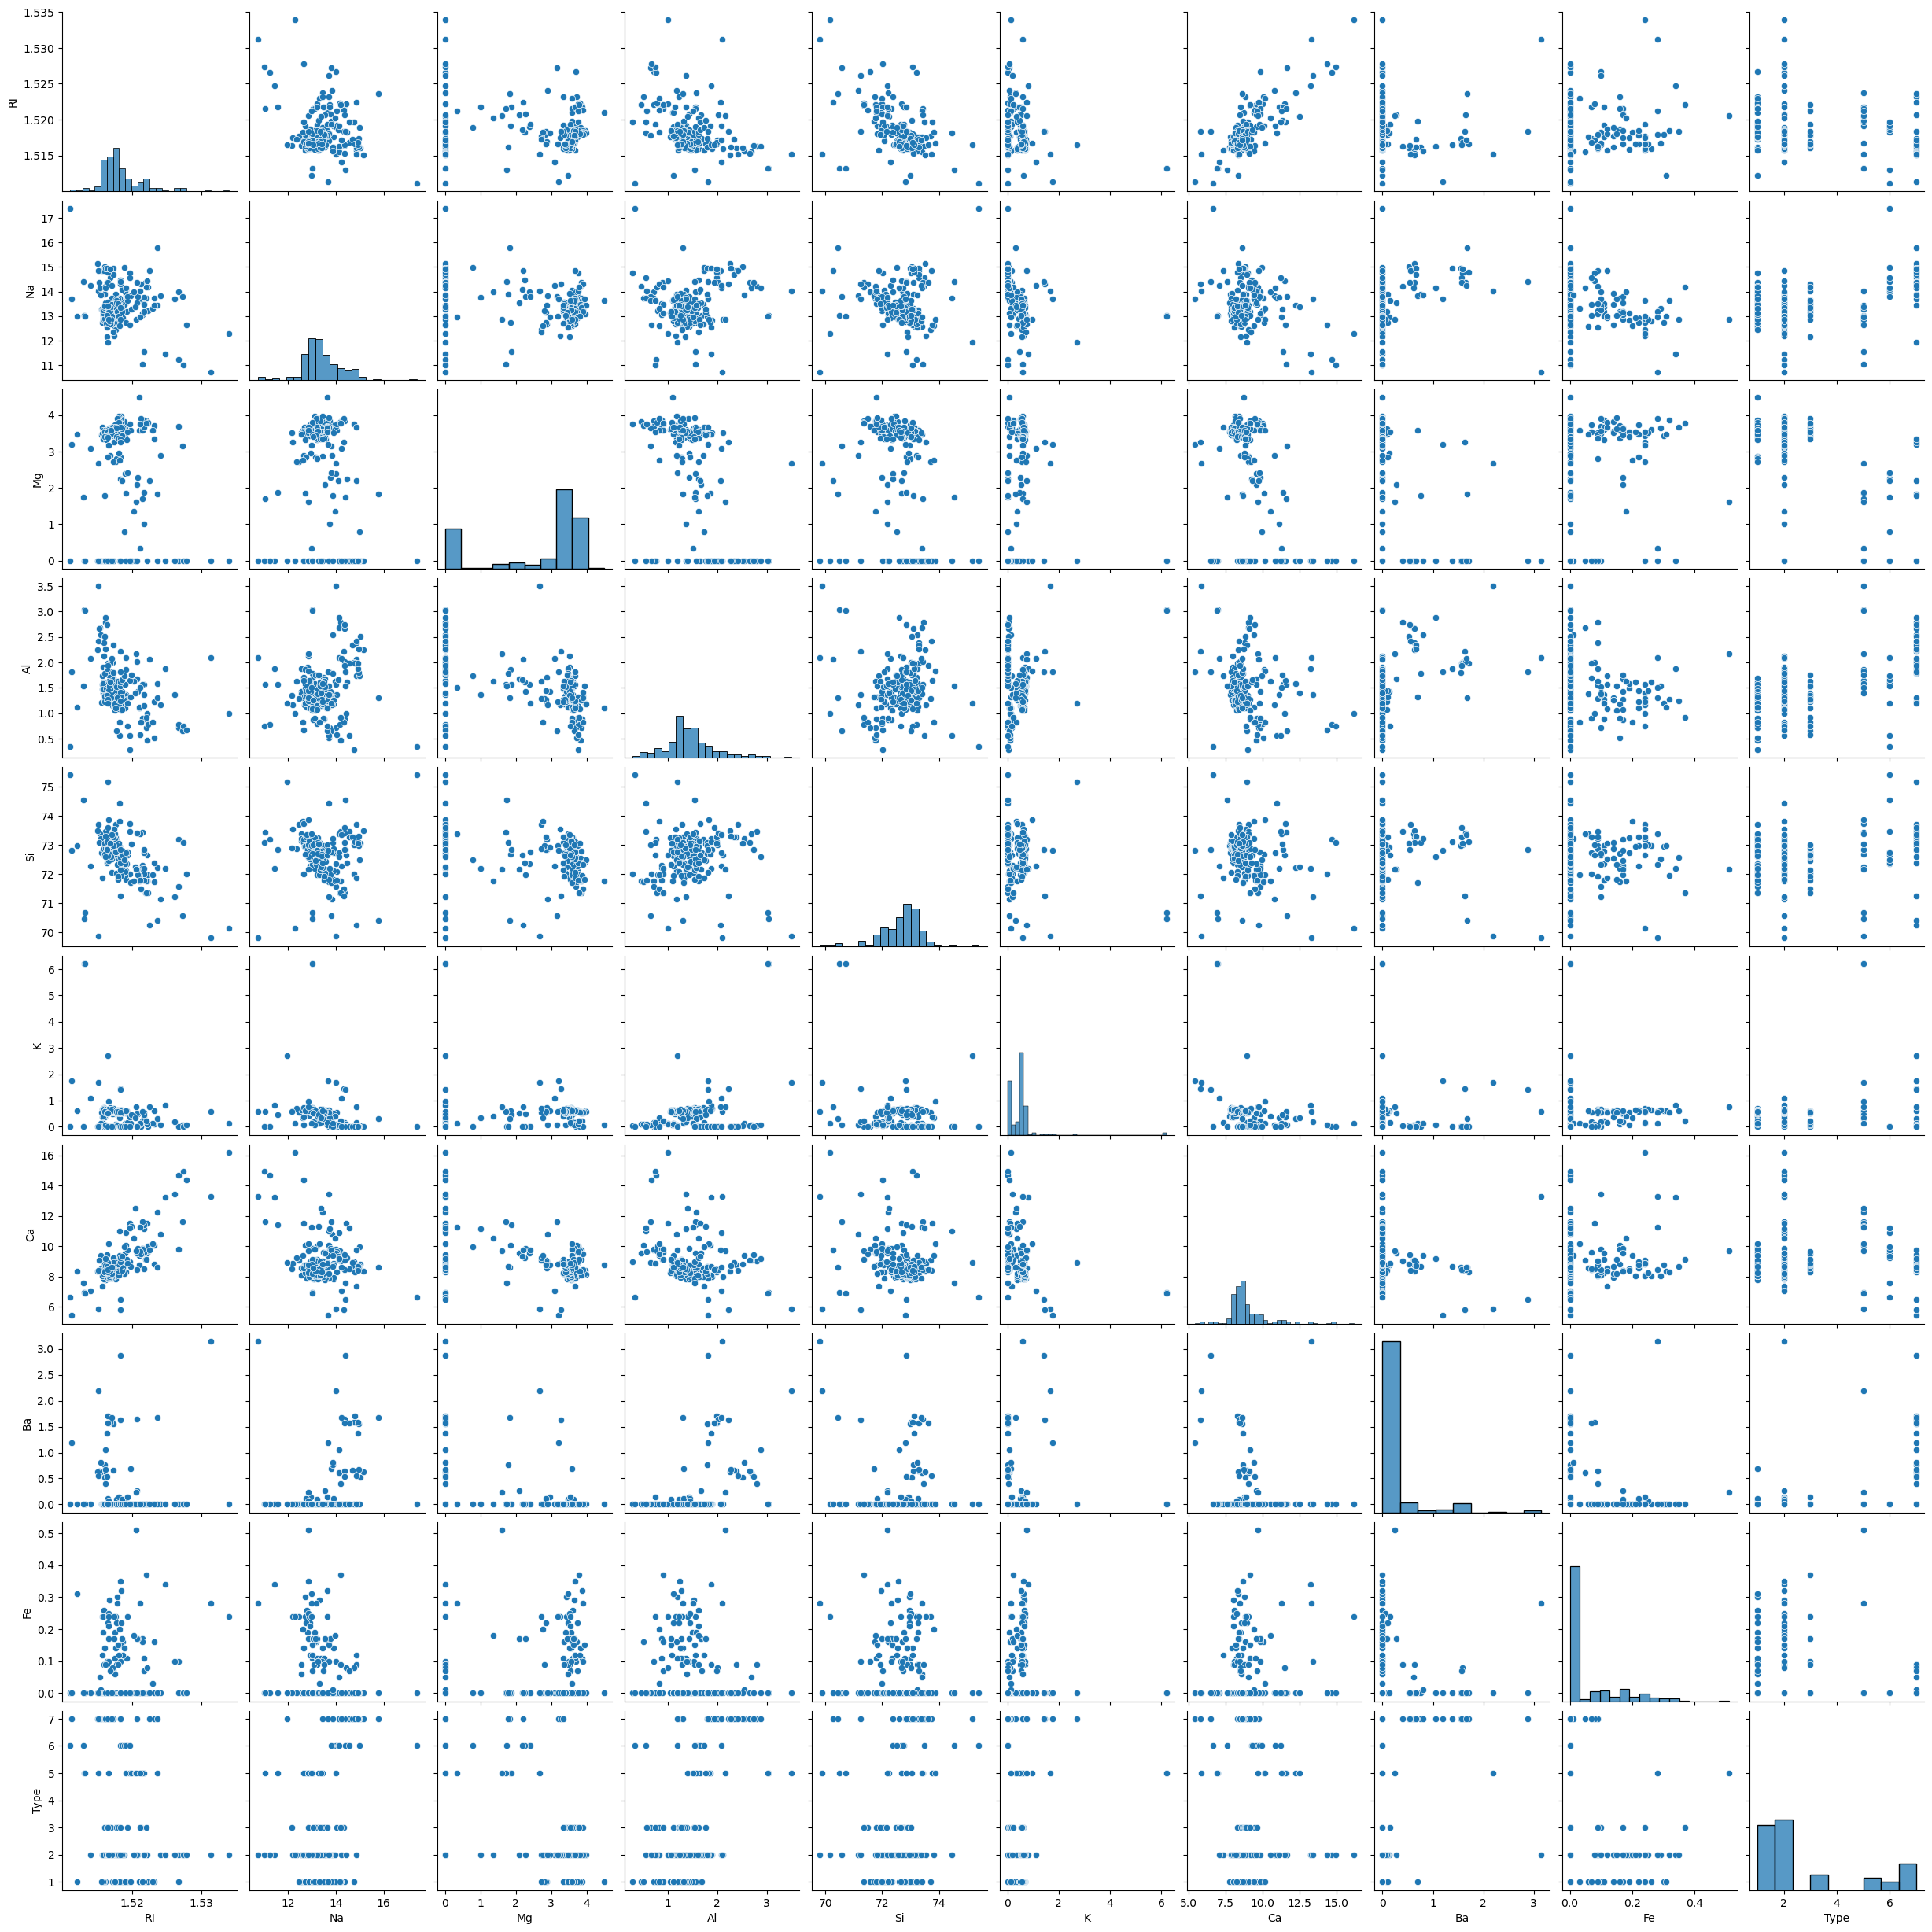

In [53]:
sns.pairplot(df)

In [54]:
x = df.drop(columns = ['Type'], axis = 1)
y = df.Type

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [56]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn_model = KNeighborsClassifier()

In [59]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [60]:
knn_pred = knn_model.predict(x_test)

In [61]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           1       0.50      0.73      0.59        11
           2       0.59      0.71      0.65        14
           3       0.00      0.00      0.00         3
           5       1.00      0.50      0.67         4
           6       1.00      0.33      0.50         3
           7       1.00      0.88      0.93         8

    accuracy                           0.65        43
   macro avg       0.68      0.52      0.56        43
weighted avg       0.67      0.65      0.63        43



D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Enhance Model Performance**

In [65]:
# calculate scores based on k values
import warnings
warnings.filterwarnings("ignore")

score = []
for i in range(1,40):
    #model
    knn_model = KNeighborsClassifier(n_neighbors = i)
    #fit model
    knn_model.fit(x_train, y_train)
    score.append(knn_model.score(x_test, y_test))

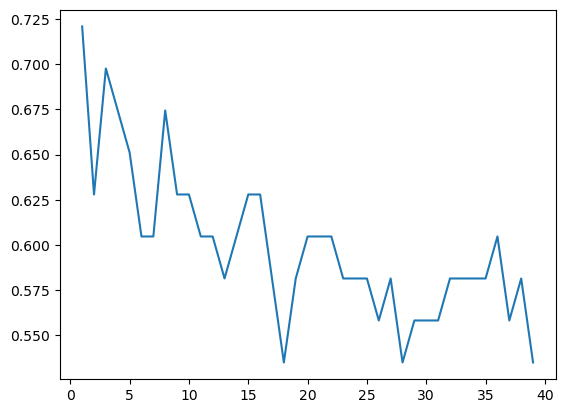

In [66]:
plt.plot(range(1,40), score)

In [67]:
#2- grid search ---> hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [73]:
param = {
    "n_neighbors" : list(range(1,60)),
    "p" : [1,2], # 1 = manhattan , 2 = ecuildien
    "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'] 
}

In [74]:
gs_model = GridSearchCV(knn_model, param, cv = 5)
gs_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=39),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'p': [1, 2]})

In [75]:
print(gs_model.best_params_)

{'algorithm': 'auto', 'n_neighbors': 1, 'p': 1}


In [76]:
print(gs_model.best_score_)

0.6957983193277311


In [78]:
knn_model = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 1, p = 1)

In [79]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1, p=1)

In [80]:
knn_pred = knn_model.predict(x_test)

In [81]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           1       0.67      0.73      0.70        11
           2       0.58      0.79      0.67        14
           3       1.00      0.33      0.50         3
           5       1.00      0.50      0.67         4
           6       1.00      0.67      0.80         3
           7       1.00      0.88      0.93         8

    accuracy                           0.72        43
   macro avg       0.87      0.65      0.71        43
weighted avg       0.78      0.72      0.72        43



In [83]:
#logistic regression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           1       0.53      0.91      0.67        11
           2       0.47      0.50      0.48        14
           3       0.00      0.00      0.00         3
           5       1.00      0.25      0.40         4
           6       1.00      0.33      0.50         3
           7       1.00      0.88      0.93         8

    accuracy                           0.60        43
   macro avg       0.67      0.48      0.50        43
weighted avg       0.64      0.60      0.57        43



In [84]:
params = {
    "penalty" : ['l1', 'l2', 'elasticnet', None],
    "C" : [1.0, 2.0,3.0, 4.0],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [85]:
gs_model = GridSearchCV(lr_model, params, cv = 5)
gs_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 2.0, 3.0, 4.0],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [86]:
print(gs_model.best_params_)

{'C': 4.0, 'penalty': 'l2', 'solver': 'lbfgs'}


In [87]:
print(gs_model.best_score_)

0.5964705882352941


In [88]:
#logistic regression
lr_model = LogisticRegression(C = 4.0, penalty = 'l2', solver = 'lbfgs')
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           1       0.48      0.91      0.62        11
           2       0.42      0.36      0.38        14
           3       0.00      0.00      0.00         3
           5       1.00      0.25      0.40         4
           6       1.00      0.67      0.80         3
           7       1.00      0.88      0.93         8

    accuracy                           0.58        43
   macro avg       0.65      0.51      0.52        43
weighted avg       0.61      0.58      0.55        43



In [89]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
nb_pred = nb_model.predict(x_test)
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           1       0.46      1.00      0.63        11
           2       0.38      0.21      0.27        14
           3       0.00      0.00      0.00         3
           5       1.00      0.25      0.40         4
           6       0.00      0.00      0.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.53        43
   macro avg       0.45      0.41      0.37        43
weighted avg       0.50      0.53      0.46        43



In [90]:
params = {
    'var_smoothing' : [1e-9, 1e-8, 1e-7, 1e-6]
}

In [91]:
gs  = GridSearchCV(nb_model, params, cv =10)
gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]})

In [92]:
print(gs.best_params_)

{'var_smoothing': 1e-07}


In [93]:
print(gs.best_score_)

0.39869281045751637


## **Example 3**

In [94]:
df = pd.read_csv("diabetes.csv")

In [95]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


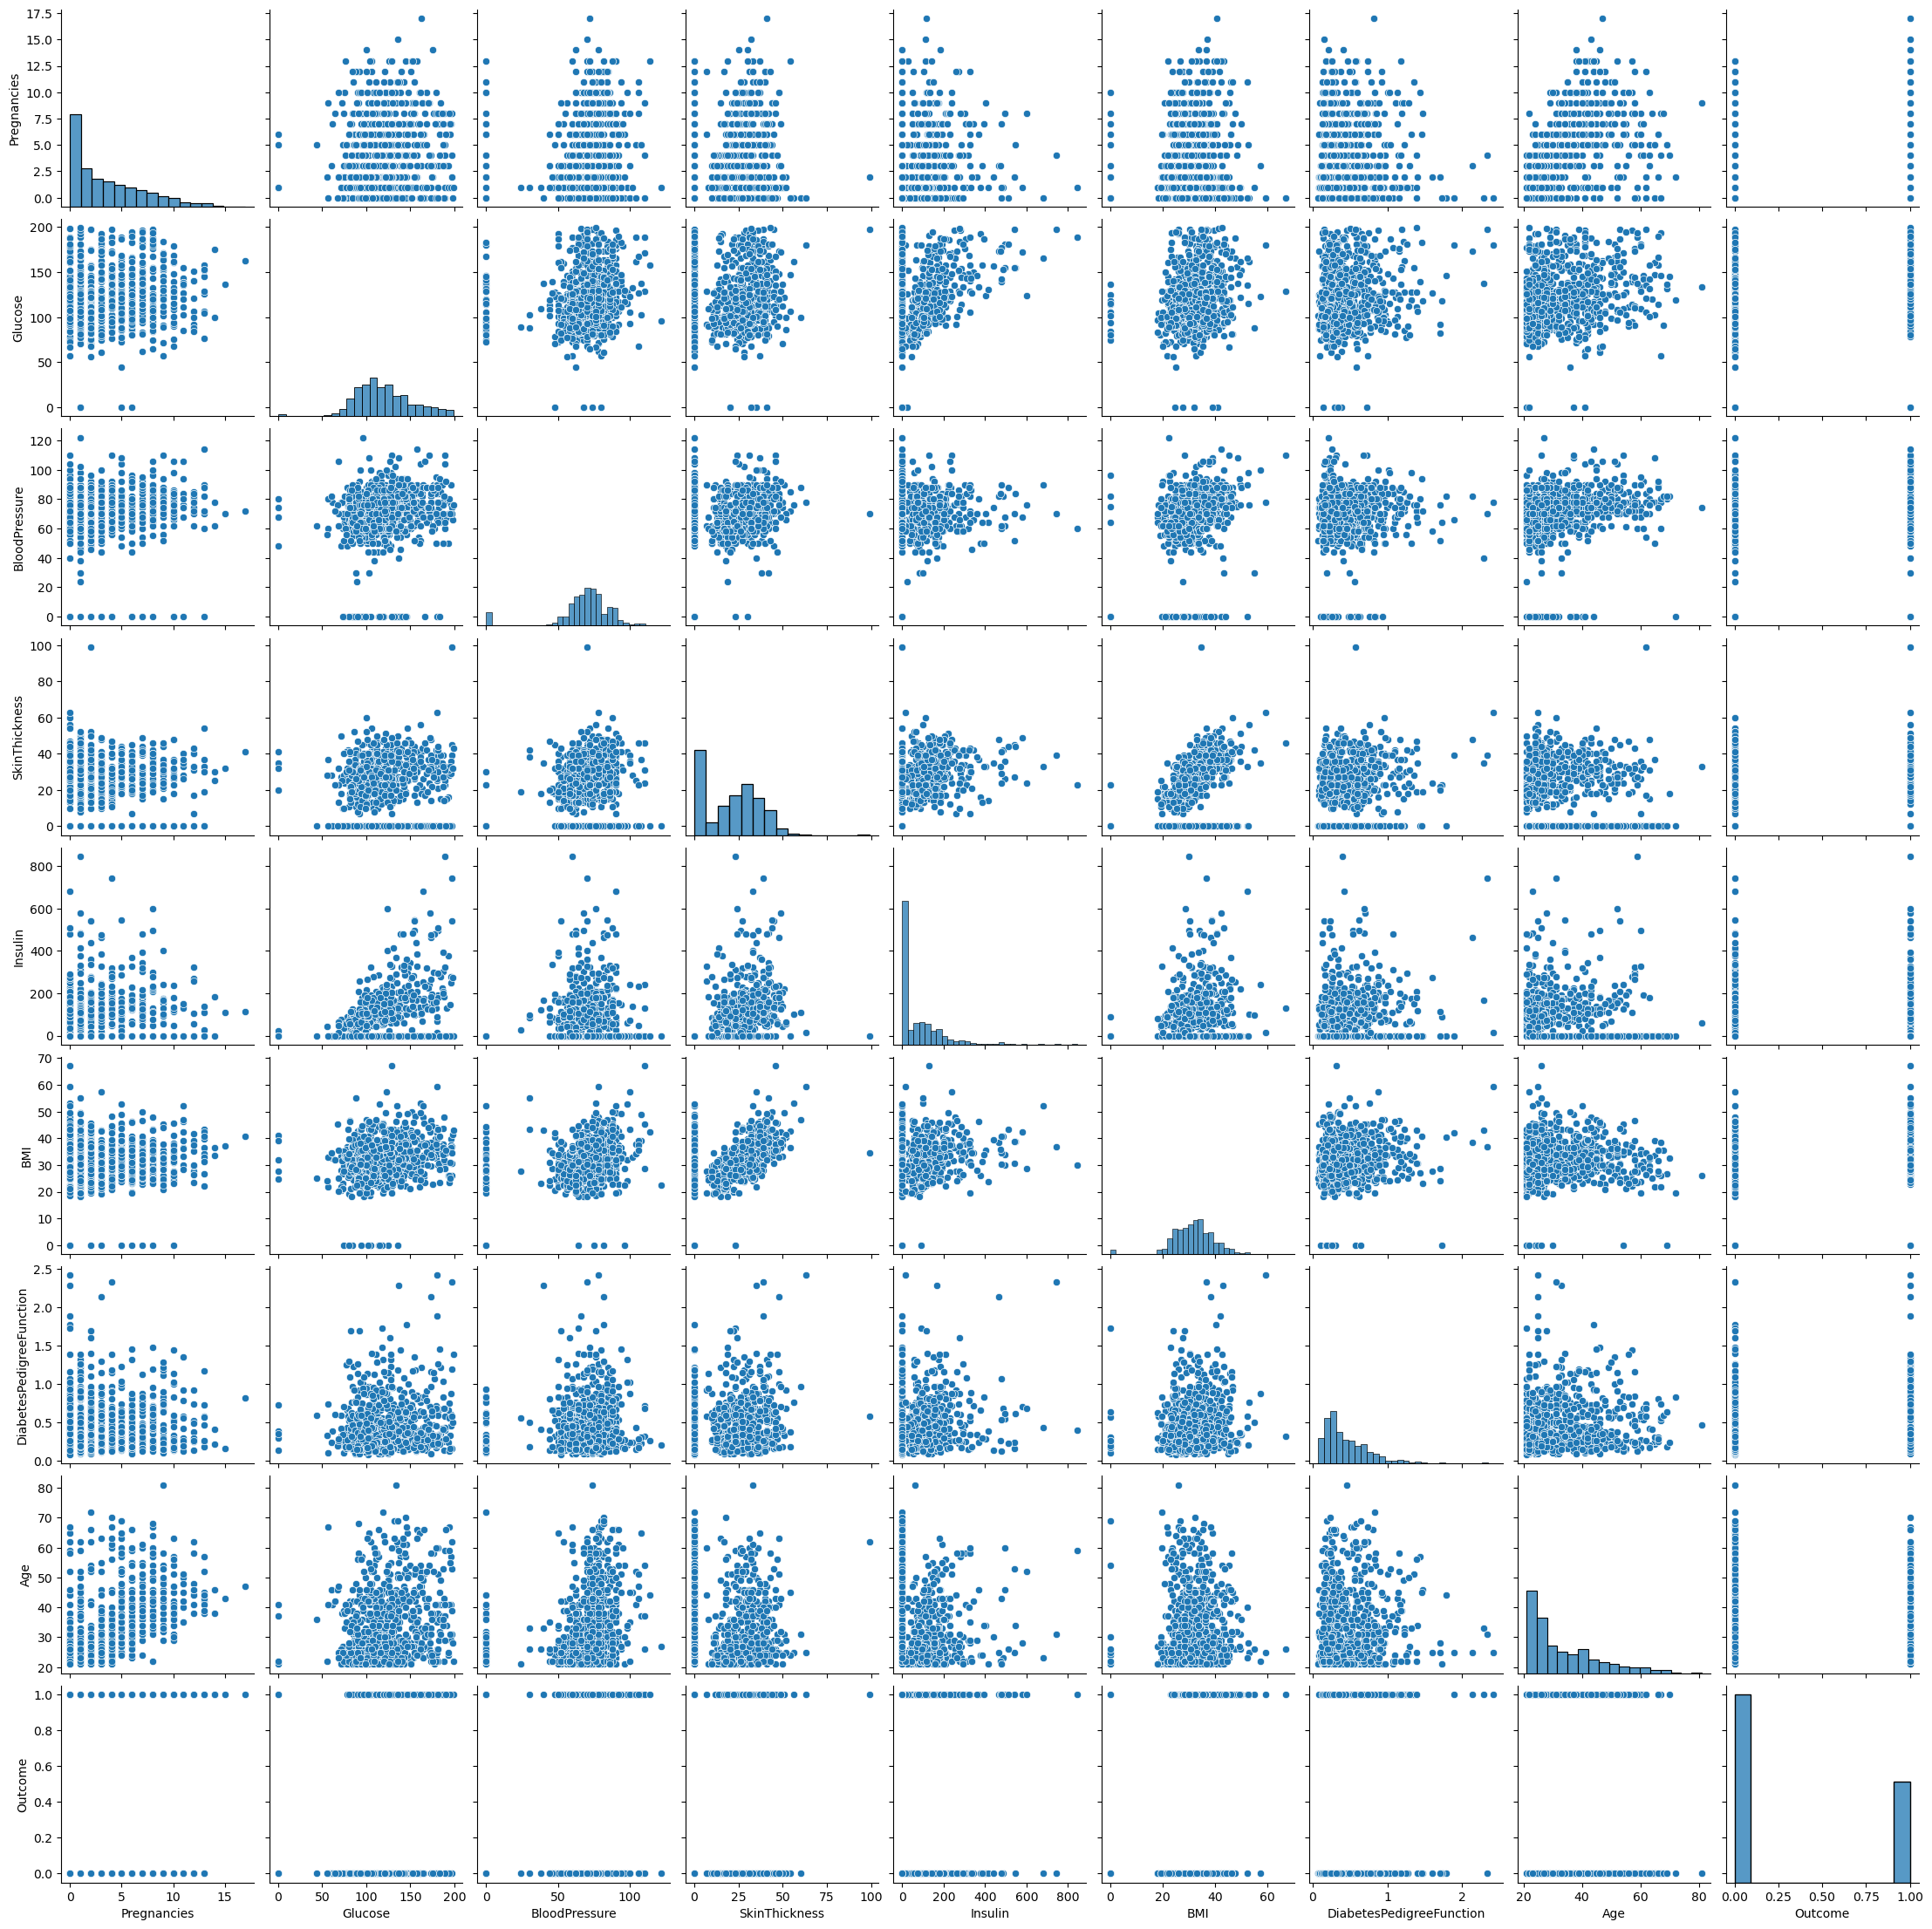

In [97]:
sns.pairplot(df)

In [98]:
x = df.drop(columns = ['Outcome'], axis = 1)
y = df.Outcome

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [101]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



In [102]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
knn_pred = knn_model.predict(x_test)
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       107
           1       0.59      0.62      0.60        47

    accuracy                           0.75       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.76      0.75      0.75       154



In [103]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
nb_pred = nb_model.predict(x_test)
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



In [106]:
params = {
    'penalty' : ['l1', 'l2', 'elasticnet', None],
    'C' : [1.0, 2.0, 3.0, 4.0, 5.0],
    'solver' :['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [108]:
gs = GridSearchCV(lr_model, params, cv = 6)
gs.fit(x_train, y_train)

GridSearchCV(cv=6, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 2.0, 3.0, 4.0, 5.0],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [109]:
print(gs.best_params_)

{'C': 1.0, 'penalty': None, 'solver': 'lbfgs'}


In [110]:
print(gs.best_score_)

0.7637699092582017


In [111]:
lr_model = LogisticRegression(C = 1.0, penalty = None, solver = 'lbfgs')
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154

